# <B>MOD 4 PROJECT

<b>main factors in life satisfaction:</b>
   <br>health status
   <br>mental health
   <br>income
   <br>employment status

# <b>DATA CLEANING

<B>IMPORTING DATA:

In [235]:
#importing necessary packages
import numpy as np
import pandas as pd
from scipy import stats 
import math
import statsmodels.api as sm
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

<B>LOOKING THROUGH THE DATASET:

In [236]:
#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('analytic_data2019.csv')
df.head()

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
#checking shape
df.shape

(3195, 534)

In [238]:
#display list of column values
list(df.columns.values)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death (Black)',
 'Premature death (Hispanic)',
 'Premature death (White)',
 'Poor or fair health raw value',
 'Poor or fair health numerator',
 'Poor or fair health denominator',
 'Poor or fair health CI low',
 'Poor or fair health CI high',
 'Poor physical health days raw value',
 'Poor physical health days numerator',
 'Poor physical health days denominator',
 'Poor physical health days CI low',
 'Poor physical health days CI high',
 'Poor mental health days raw value',
 'Poor mental health days numerator',
 'Poor mental health days denominator',
 'Poor mental health days CI low',
 'Poor mental health days CI high',
 'Low birthweight raw value',
 'Low birthweight numerator',
 'Low birthw

In [239]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [240]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [241]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Premature_death_numerator', 'Premature_death_denominator']


In [242]:
df = df.iloc[2:]

In [243]:
df = df.loc[((df['County_FIPS_Code']!='000') & (df['County_FIPS_Code']!=0))]

In [244]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_numerator,Premature_death_denominator,...,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445,63653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050,161107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
xls = pd.ExcelFile("2019 County Health Rankings Data - v2.xls")
health_rankings = xls.parse(index_col=None, na_values=['NA'])
df.to_csv('file.csv')
health_rankings.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,A collaboration between the Robert Wood Johnso...,NaN,NaN
1,NaN,NaN,NaN
2,This Excel file contains the rankings and data...,NaN,NaN
3,1) Outcomes and Factors Rankings--Ranks are al...,NaN,NaN
4,2) Outcomes and Factors SubRankings--Ranks are...,NaN,NaN


In [246]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
sheet0 = xls.parse(0,skiprows=1) 
sheet1 = xls.parse(1,skiprows=1) 
sheet2 = xls.parse(2,skiprows=1) 
sheet3 = xls.parse(3,skiprows=1) 
sheet4 = xls.parse(4,skiprows=1) 
sheet5 = xls.parse(5,skiprows=1) 
sheet6 = xls.parse(6,skiprows=1)

In [247]:
sheet4

,Focus Area,Measure,Description,Weight,Source,Year(s),Top performers,US Overall
0,Length of life (50%),Premature death,Years of potential life lost before age 75 per...,0.5,National Center for Health Statistics – Mortal...,2015-2017,5400,6900
1,Quality of life (50%),Poor or fair health,% of adults reporting fair or poor health,0.1,Behavioral Risk Factor Surveillance System,2016,0.12,0.16
2,NaN,Poor physical health days,Average # of physically unhealthy days reporte...,0.1,Behavioral Risk Factor Surveillance System,2016,3,3.7
3,NaN,Poor mental health days,Average # of mentally unhealthy days reported ...,0.1,Behavioral Risk Factor Surveillance System,2016,3.1,3.8
4,NaN,Low birthweight,% of live births with low birthweight (< 2500 ...,0.2,National Center for Health Statistics – Natali...,2011-2017,0.06,0.08
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Health Behaviors (30%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Focus Area,Measure,NaN,Weight,Source,Year(s),Top performers,US Overall
8,Tobacco use (10%),Adult smoking,% of adults who are current smokers,0.1,Behavioral Risk Factor Surveillance System,2016,0.14,0.17
9,Diet and exercise (10%),Adult obesity,% of adults that report a BMI ≥ 30,0.05,CDC Diabetes Interactive Atlas,2015,0.26,0.29


In [248]:
sheet3.set_index('FIPS', inplace=True)
sheet5.set_index('FIPS', inplace=True)

In [249]:
#combined = pd.concat([df, sheet5, sheet3], axis=1, sort=False, join='inner')

combined = pd.concat([df], axis=1, sort=False, join='inner')
combined.shape

(3142, 534)

In [250]:
df = combined.copy()

In [251]:
clean_columns = [x for x in df.columns if
                 ("numerator" not in x) and
                 ("denominator" not in x) and
                 ("CI_low" not in x) and
                 ("CI_high" not in x)]

In [252]:
df = combined[clean_columns]
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),...,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,10471.252986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,10042.472874,3086.6056945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,11332.562909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,14812.53928,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,NaN,5619.6451858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
#checking the data types for each column
for col in df.columns:
    print(df[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
object Premature_death_raw_value
object Premature_death_(Black)
object Premature_death_(Hispanic)
object Premature_death_(White)
object Poor_or_fair_health_raw_value
object Poor_physical_health_days_raw_value
object Poor_mental_health_days_raw_value
object Low_birthweight_raw_value
object Low_birthweight_(Black)
object Low_birthweight_(Hispanic)
object Low_birthweight_(White)
object Adult_smoking_raw_value
object Adult_obesity_raw_value
object Food_environment_index_raw_value
object Physical_inactivity_raw_value
object Access_to_exercise_opportunities_raw_value
object Excessive_drinking_raw_value
object Alcohol-impaired_driving_deaths_raw_value
object Sexually_transmitted_infections_raw_value
object Teen_births_raw_value
object Teen_births_(Black)
object Teen_births_(Hispanic)
object Teen_births_(White)
object Uninsured_raw_

In [254]:
df1=df[['State_FIPS_Code','County_FIPS_Code','5-digit_FIPS_Code','State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]

In [255]:
df2 = df.iloc[:,7:].astype(float)

In [256]:
dfClean = df1.merge(df2, left_index=True,right_index=True)
dfClean.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),...,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,01,001,01001,AL,Autauga County,2019,1,8824.057123,10471.252986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.632160,10042.472874,3086.605695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,11332.562909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,14812.539280,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,NaN,5619.645186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
#checking the data types for each column
for col in df.columns:
    print(dfClean[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
float64 Premature_death_raw_value
float64 Premature_death_(Black)
float64 Premature_death_(Hispanic)
float64 Premature_death_(White)
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Low_birthweight_(Black)
float64 Low_birthweight_(Hispanic)
float64 Low_birthweight_(White)
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Teen_births_(Black)
float64 Teen_births_(Hispanic)
float64 Teen_births_(White

# <b>EXPLORATORY DATA ANALYSIS

# <B>Mental health:

In [258]:
dfMH=df[['State_Abbreviation','Name','Poor_mental_health_days_raw_value']]
dfMH.head()

,State_Abbreviation,Name,Poor_mental_health_days_raw_value
3,AL,Autauga County,4.3067392835
4,AL,Baldwin County,4.2496487805
5,AL,Barbour County,4.634994147
6,AL,Bibb County,4.3157100192
7,AL,Blount County,4.7015992588


In [259]:
for col in dfMH.columns:
    print(dfMH[col].dtypes, col)

object State_Abbreviation
object Name
object Poor_mental_health_days_raw_value


In [260]:
#changing the type of mental health days raw value from an object to a float
dfMH['Poor_mental_health_days_raw_value']=dfMH['Poor_mental_health_days_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [261]:
dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean()

State_Abbreviation
AK    3.636779
AL    4.706399
AR    4.920800
AZ    4.259460
CA    3.803822
CO    3.535565
CT    3.539592
DC    3.542423
DE    3.690745
FL    4.119860
GA    4.005318
HI    3.212321
IA    3.238646
ID    3.902228
IL    3.656727
IN    4.055998
KS    3.285827
KY    4.566015
LA    4.375729
MA    4.095592
MD    3.685777
ME    4.022771
MI    4.191772
MN    3.041505
MO    4.478655
MS    4.260233
MT    3.445554
NC    4.210638
ND    2.815294
NE    3.083371
NH    3.930848
NJ    3.641218
NM    4.117793
NV    4.277706
NY    3.901546
OH    4.031130
OK    4.626338
OR    4.300585
PA    4.019852
RI    3.909078
SC    4.541641
SD    3.050082
TN    4.775436
TX    3.643422
UT    3.642977
VA    3.688398
VT    4.018105
WA    3.955534
WI    3.548089
WV    5.120039
WY    3.467113
Name: Poor_mental_health_days_raw_value, dtype: float64

Text(0.5, 0, 'State')

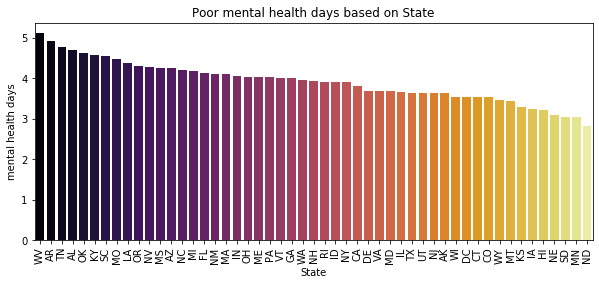

In [262]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_mental_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor mental health days based on State')
ax.set_ylabel('mental health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')


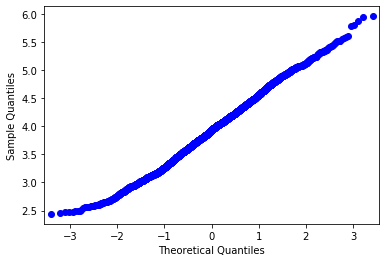

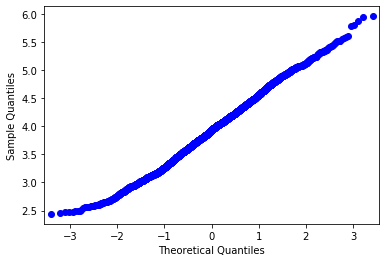

In [263]:
sm.qqplot(dfMH['Poor_mental_health_days_raw_value'])

# <b>Physical health:

In [264]:
dfFH=df[['State_Abbreviation','Name','Poor_physical_health_days_raw_value']]
dfFH.head()

,State_Abbreviation,Name,Poor_physical_health_days_raw_value
3,AL,Autauga County,4.2005779826
4,AL,Baldwin County,4.0987477691
5,AL,Barbour County,5.0674383044
6,AL,Bibb County,4.3633772783
7,AL,Blount County,4.5127526482


In [265]:
#changing the type of physical health days raw value from an object to a float
dfFH['Poor_physical_health_days_raw_value']=dfFH['Poor_physical_health_days_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'State')

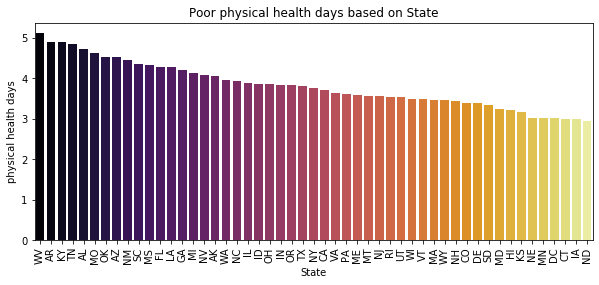

In [266]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfFH.groupby(['State_Abbreviation'])['Poor_physical_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_physical_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor physical health days based on State')
ax.set_ylabel('physical health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

# <b>Income:

In [267]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(Hispanic),...,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,10471.252986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,10042.472874,3086.6056945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,11332.562909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,14812.53928,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,NaN,5619.6451858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
dfI=df[['State_Abbreviation','Median_household_income_raw_value']]

In [269]:
dfI['Median_household_income_raw_value']=dfI['Median_household_income_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

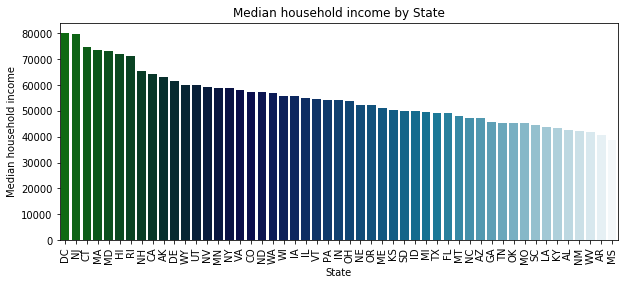

In [270]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfI.groupby(['State_Abbreviation'])['Median_household_income_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Median_household_income_raw_value'], x = cnt.index, palette= 'ocean')
ax.set_title('Median household income by State')
ax.set_ylabel('Median household income')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

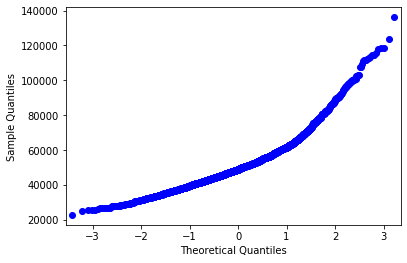

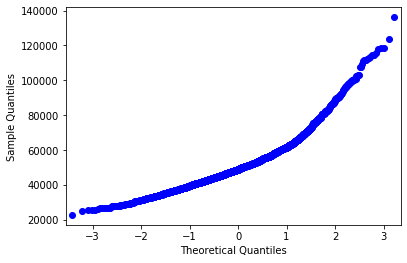

In [271]:
sm.qqplot(dfI['Median_household_income_raw_value'])

# <b>Employment status:

In [272]:
dfNew=df[['State_Abbreviation','Name','Unemployment_raw_value']]

In [273]:
dfNew.head()

,State_Abbreviation,Name,Unemployment_raw_value
3,AL,Autauga County,0.0386352233
4,AL,Baldwin County,0.0398833641
5,AL,Barbour County,0.0590092278
6,AL,Bibb County,0.043851399
7,AL,Blount County,0.0402139299


In [274]:
dfNew['Unemployment_raw_value']=dfNew['Unemployment_raw_value'].astype(float)

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

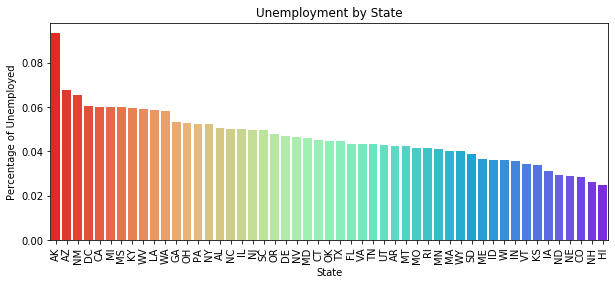

In [275]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfNew.groupby(['State_Abbreviation'])['Unemployment_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Unemployment_raw_value'], x = cnt.index, palette= 'rainbow_r')
ax.set_title('Unemployment by State')
ax.set_ylabel('Percentage of Unemployed')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

In [276]:
dfFin=dfClean[['State_Abbreviation','Name','Poor_physical_health_days_raw_value',
       'Poor_mental_health_days_raw_value', 'Median_household_income_raw_value', 'Frequent_physical_distress_raw_value',
       'Frequent_mental_distress_raw_value',
       'Diabetes_prevalence_raw_value', 'HIV_prevalence_raw_value',
       'Food_insecurity_raw_value',
       'Limited_access_to_healthy_foods_raw_value',
       'Drug_overdose_deaths_raw_value','Unemployment_raw_value']]

In [277]:
dfFin.head()

,State_Abbreviation,Name,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Median_household_income_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Unemployment_raw_value
3,AL,Autauga County,4.200578,4.306739,58343.0,0.128244,0.126384,0.142,225.5,0.134,0.119911,9.623076,0.038635
4,AL,Baldwin County,4.098748,4.249649,56607.0,0.126220,0.128226,0.113,163.9,0.123,0.054244,16.322612,0.039883
5,AL,Barbour County,5.067438,4.634994,32490.0,0.162162,0.146323,0.180,436.0,0.232,0.107397,NaN,0.059009
6,AL,Bibb County,4.363377,4.315710,45795.0,0.131630,0.128540,0.149,191.9,0.158,0.026016,22.093263,0.043851
7,AL,Blount County,4.512753,4.701599,48253.0,0.137201,0.138279,0.143,95.4,0.110,0.028801,24.799585,0.040214


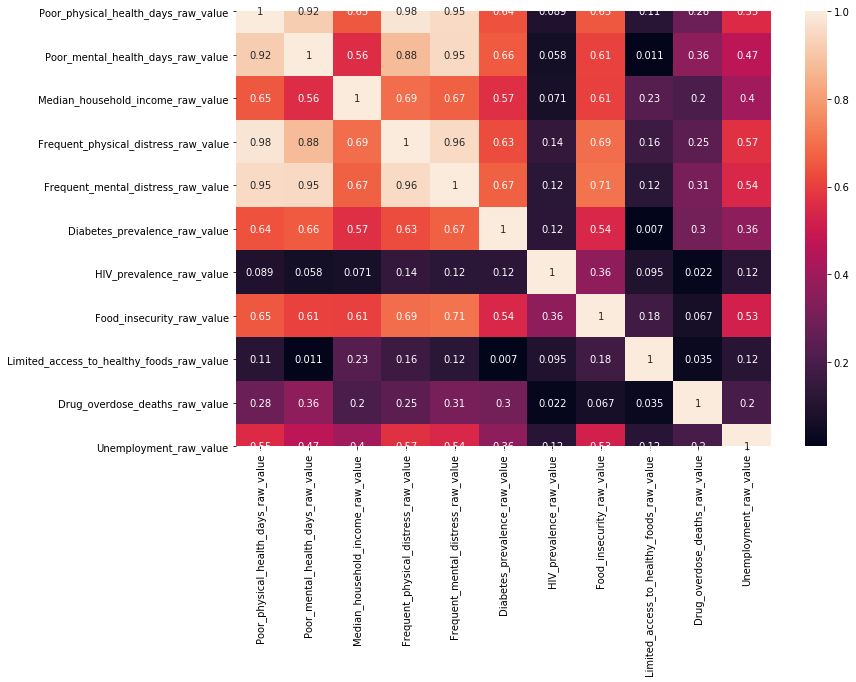

In [278]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(dfFin.corr().abs(), annot=True)

# <b>MODELLING

In [279]:
dfclean=dfClean

In [280]:
for col in dfclean.columns:
    print(dfclean[col].isna().sum(), col)

0 State_FIPS_Code
0 County_FIPS_Code
0 5-digit_FIPS_Code
0 State_Abbreviation
0 Name
0 Release_Year
0 County_Ranked_(Yes=1/No=0)
61 Premature_death_raw_value
1789 Premature_death_(Black)
2304 Premature_death_(Hispanic)
1561 Premature_death_(White)
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
107 Low_birthweight_raw_value
1753 Low_birthweight_(Black)
1738 Low_birthweight_(Hispanic)
1326 Low_birthweight_(White)
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
19 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
6 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
33 Alcohol-impaired_driving_deaths_raw_value
158 Sexually_transmitted_infections_raw_value
144 Teen_births_raw_value
1754 Teen_births_(Black)
1567 Teen_births_(Hispanic)
1216 Teen_births_(White)
1 Uninsured_raw_value
135 Primary_care_physicians_raw_value
135 Ratio_of_population_to_primary_care_physicians.
85 Dentists_raw_value
8

In [281]:
dfreg = dfclean
dfreg.iloc[:,1:] = dfreg.groupby("State_Abbreviation").transform(lambda x: x.fillna(x.median()))
dfreg = dfreg.drop(columns = ['Name', 'Release_Year'])
dfreg = dfreg.dropna(axis='columns')
dfreg


,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_(Black),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,...,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
3,01,001,01001,1,8824.057123,10471.252986,8706.658832,0.184111,4.200578,4.306739,...,0.151196,0.192545,0.004756,0.012792,0.001045,0.028575,0.744739,0.008285,0.513422,0.420022
4,01,003,01003,1,7224.632160,10042.472874,7277.780727,0.180605,4.098748,4.249649,...,0.199470,0.089532,0.007760,0.011565,0.000687,0.045502,0.830474,0.004545,0.514528,0.422791
5,01,005,01005,1,9586.165037,11332.562909,7309.636719,0.257734,5.067438,4.634994,...,0.188247,0.479422,0.006529,0.004630,0.001860,0.042066,0.459557,0.011993,0.472299,0.677896
6,01,007,01007,1,11783.543675,14812.539280,11327.563749,0.199969,4.363377,4.315710,...,0.160226,0.214576,0.004279,0.002206,0.001147,0.026381,0.742986,0.003943,0.464531,0.683526
7,01,009,01009,1,10908.101822,12625.028215,11336.046321,0.210953,4.512753,4.701599,...,0.178426,0.014600,0.006326,0.003017,0.001172,0.095651,0.869443,0.018700,0.506886,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,1,7497.439952,7445.913422,7834.050381,0.153772,3.536556,3.543546,...,0.113750,0.010911,0.015344,0.008338,0.001424,0.162494,0.793587,0.015828,0.484541,0.109163
3191,56,39,56039,1,3786.128226,7445.913422,8074.232439,0.121817,3.166316,3.072253,...,0.143950,0.005330,0.009069,0.012293,0.001332,0.149839,0.817021,0.040420,0.480980,0.464309
3192,56,41,56041,1,7790.302043,7445.913422,8074.232439,0.158858,3.677538,3.699922,...,0.131886,0.006831,0.013955,0.004928,0.001757,0.091632,0.874750,0.009114,0.495731,0.430959
3193,56,43,56043,1,5504.650970,7445.913422,8074.232439,0.161261,3.601687,3.479694,...,0.208085,0.004712,0.017237,0.007564,0.001116,0.142485,0.824281,0.003462,0.494668,0.359545


In [282]:
for col in dfreg.columns:
    print(dfreg[col].isna().sum(), col)

0 State_FIPS_Code
0 County_FIPS_Code
0 5-digit_FIPS_Code
0 County_Ranked_(Yes=1/No=0)
0 Premature_death_raw_value
0 Premature_death_(Black)
0 Premature_death_(White)
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Low_birthweight_(Black)
0 Low_birthweight_(Hispanic)
0 Low_birthweight_(White)
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Teen_births_(Black)
0 Teen_births_(White)
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hosp

In [283]:
for col in dfreg.columns:
    print(dfreg[col].isnull().sum(), col)

0 State_FIPS_Code
0 County_FIPS_Code
0 5-digit_FIPS_Code
0 County_Ranked_(Yes=1/No=0)
0 Premature_death_raw_value
0 Premature_death_(Black)
0 Premature_death_(White)
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Low_birthweight_(Black)
0 Low_birthweight_(Hispanic)
0 Low_birthweight_(White)
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Teen_births_(Black)
0 Teen_births_(White)
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hosp

In [284]:
print(dfreg.isna().sum(),
dfreg.isnull().sum())

State_FIPS_Code                          0
County_FIPS_Code                         0
5-digit_FIPS_Code                        0
County_Ranked_(Yes=1/No=0)               0
Premature_death_raw_value                0
                                        ..
%_Hispanic_raw_value                     0
%_Non-Hispanic_white_raw_value           0
%_not_proficient_in_English_raw_value    0
%_Females_raw_value                      0
%_Rural_raw_value                        0
Length: 107, dtype: int64 State_FIPS_Code                          0
County_FIPS_Code                         0
5-digit_FIPS_Code                        0
County_Ranked_(Yes=1/No=0)               0
Premature_death_raw_value                0
                                        ..
%_Hispanic_raw_value                     0
%_Non-Hispanic_white_raw_value           0
%_not_proficient_in_English_raw_value    0
%_Females_raw_value                      0
%_Rural_raw_value                        0
Length: 107, dtype: int64


In [285]:
dfreg.describe()

,Premature_death_raw_value,Premature_death_(Black),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),...,%_65_and_older_raw_value,%_Non-Hispanic_African_American_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_Hispanic_raw_value,%_Non-Hispanic_white_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,8462.386017,11064.165096,8039.764390,0.174833,3.922021,3.932145,0.080756,0.128110,0.072917,0.072959,...,0.188134,0.089671,0.023302,0.015272,0.001369,0.094777,0.762858,0.017312,0.498935,0.586348
std,2713.205981,9534.158569,2069.975715,0.046994,0.714456,0.613682,0.020314,0.026254,0.014116,0.011786,...,0.046173,0.143099,0.077339,0.029127,0.009494,0.137545,0.201497,0.029007,0.022428,0.314690
min,2610.690433,3395.803526,2594.916115,0.082892,2.323511,2.439654,0.026455,0.049383,0.035714,0.036554,...,0.047665,0.000000,0.000000,0.000000,0.000000,0.005152,0.027604,0.000000,0.265749,0.000000
25%,6602.980361,8665.899765,6547.773248,0.139420,3.393395,3.494451,0.066891,0.115552,0.065828,0.064762,...,0.158406,0.006844,0.003719,0.004471,0.000301,0.022993,0.645508,0.002758,0.493961,0.333794
50%,8090.842090,11282.053127,7717.811441,0.166916,3.870800,3.937506,0.077523,0.130391,0.070732,0.072334,...,0.184577,0.021814,0.006331,0.007055,0.000588,0.042757,0.837195,0.007370,0.503145,0.595379
75%,9962.338263,12515.671373,9109.516043,0.204765,4.417652,4.348074,0.090397,0.141232,0.078600,0.079630,...,0.213182,0.101751,0.013063,0.013891,0.001136,0.096995,0.925087,0.018644,0.510174,0.877254
max,35146.645203,520250.018000,24451.877544,0.407324,7.230990,5.964156,0.261364,0.333333,0.209677,0.208333,...,0.569440,0.853296,0.926969,0.430067,0.477273,0.963230,0.979227,0.353053,0.570038,1.000000


In [286]:
X = dfreg[['Unemployment_raw_value', 'Median_household_income_raw_value', 'Poor_physical_health_days_raw_value']]
y = dfreg['Poor_mental_health_days_raw_value']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [288]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 1, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 1 0.8672191011824997


In [203]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [ 0.00000000e+00  1.16877975e+01  2.85854864e-05  1.57993917e+00
 -1.32523323e+01 -8.95298698e-05 -1.66342166e+00 -1.02033363e-10
 -2.41226424e-06 -6.51810088e-02]
Train Mean Squarred Error: 0.053655248378531056
r_squared_score: 0.8573119327046581


In [204]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
y_train.shape

(2356,)

In [206]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [207]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_scaled)
y_h_ridge_test = ridge.predict(X_test_scaled)

y_h_lasso_train = np.reshape(lasso.predict(X_train_scaled), (2356, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_scaled), (786, 1))

y_h_lin_train = lin.predict(X_train_scaled)
y_h_lin_test = lin.predict(X_test_scaled)

In [208]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_scaled))**2))

Train Error Ridge Model 3856705.9687229255
Test Error Ridge Model 444158.4314818387


Train Error Lasso Model 727.4202813070727
Test Error Lasso Model 242.1113491034178


Train Error Unpenalized Linear Model 3857574.4401995176
Test Error Unpenalized Linear Model 444264.30232243025
